# One Sample T-Test - Lab

## Introduction
Just as you previously used the t distribution to provide confidence intervals on estimating the population mean, you can also use similar methods to test whether two populations are different, statistically speaking. To do this, you can use a t-test.

## Objectives
You will be able to:

* Perform a complete one sample t-test analysis and describe the results


### Exercise 1: 

Create a function in python `one_sample_ttest(sample, popmean, alpha)` that will take in sample data (an array of observations), the population mean and the alpha value to calculate and print out the t-statistic, critical t-value and p-value for the sample and identify if the results are significant or not. The function should also create a visualization using seaborn of the distribution to check for normality.

In [1]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    import seaborn as sns
    sns.distplot(sample)
    
    # Population mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    x_bar = sample.mean()
    
    # Sample Standard Deviation (sigma) using Numpy
    import numpy as np
    sigma = np.std(sample,ddof=1)
    
    # Degrees of freedom
    n = len(sample)
    df = n - 1
    
    # Calculate the critical t-value
    from scipy import stats 
    t_crit = np.round(stats.t.ppf(1 - alpha, df=df),3)
    
    # Calculate the t-value and p-value      
    results = stats.ttest_1samp(a= sample, popmean= mu)
    t = results[0]
    p = results[1]
    
    # return results
    if (t>t_crit) and (p<alpha):
        return print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           t, "and p-value =", p, "The critical t-value is", t_crit)
    else:
        return print (f'Null hypothesis is Accepted. The t-statistic is {t} \n The p-value is {p} \n The t-critical value is {t_crit}')

### Exercise 2:

Use the function created in exercise 1 to answer the following analytical questions.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online- course, on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the online training has really helped the students and now they should perform better than the class (population) mean. Use this to set your null and alternate hypotheses.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t and p values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Bonus: What is the effect size of the first sample compared to the population? How can you interpret this effect size in relation to your significance test?


### Solution:

In [2]:
import numpy as np
popmean = 65
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1,78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])
alpha = .05
one_sample_ttest(sample, popmean, alpha)


Null hypothesis rejected. Results are statistically significant with t-value = 12.687592157174493 and p-value = 1.0053355594452825e-10 The critical t-value is 1.729


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Null hypothesis rejected. Results are statistically significant with t-value = 13.202088288314906 and p-value = 5.083361606682268e-11 The critical t-value is 1.729


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


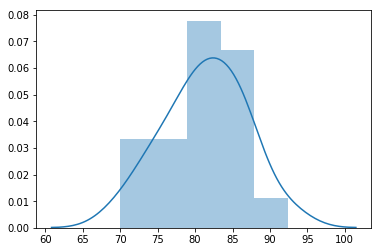

In [3]:
popmean = 65
sample = np.array([84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1,78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3])
alpha = .05
one_sample_ttest(sample, popmean, alpha)

In [ ]:
# What is the effect size of the first sample compared to the population? 
#How can you interpret this effect size in relation to your significance test?

def Cohen_d(group1, group2):

    # Compute Cohen's d.

    # group1: Series or NumPy array
    # group2: Series or NumPy array

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [ ]:
Cohen_d(group1, sample)#???? how to do this if I don't have popylation lenght or variance?

## Summary

In this lab, you saw a quick introduction to hypothesis testing using frequentist methods with t-values and p-values. You saw how a one sample t-test can be applied to contexts where the population mean is unknown and you have a limited amount of sample data. You looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also briefly explains the comparison of using p-value for statistical significance vs. effect sizes. 